In [32]:
from valis import slide_io
import matplotlib.pyplot as plt
import numpy as np
import cv2

# slide_src_f = '/share/ymz/valisProject/data/mIF_175_organized/P16/_Image_222637-P16-01_/stack1/frame_t.ets'
# slide_src_f = '/share/ymz/valisProject/data/mIF_175_organized/P18/_Image_222639-P18-01_/stack1/frame_t.ets'
slide_src_f = '/public/share/ymz/valisProject/data/mIF_175_organized/P71/_Image_222481-P71-01_/stack1/frame_t.ets'
series = 2

# Get reader for slide format
reader_cls = slide_io.get_slide_reader(slide_src_f, series=series) #Get appropriate slide reader class
reader = reader_cls(slide_src_f, series=series) # Instantiate reader

In [33]:
vips_img = reader.slide2vips(level=2, series=series, xywh=(67, 404, 3309, 2898))

Converting slide to pyvips image


100%|██████████| 16/16 [00:00<00:00, 48454.05it/s]


In [30]:
reader

In [31]:
vips_img

<pyvips.Image 3309x2898 ushort, 6 bands, multiband>

In [37]:
vips_img.bands

6

In [38]:
x = vips_img.flipver()

In [39]:
x.bands

6

In [10]:
vips_img.fliphor()

<pyvips.Image 3309x2898 ushort, 6 bands, multiband>

In [11]:
#Get size of images in each pyramid level (width, height)
pyramid_level_sizes_wh = reader.metadata.slide_dimensions

In [12]:
# img = reader.slide2image(level=0)
pyramid_level_sizes_wh

array([[14216, 14993],
       [ 7108,  7497],
       [ 3554,  3749],
       [ 1777,  1875],
       [  889,   938],
       [  445,   469]])

In [13]:
img = reader.slide2image(level=5)

In [14]:
img = np.mean(img, axis=2)
img.shape

(469, 445)

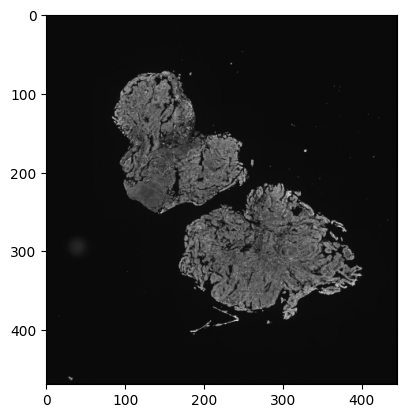

In [15]:

plt.imshow(img, cmap='gray')

In [16]:
img.dtype

dtype('float64')

In [17]:
img.shape

(469, 445)

Text(0.5, 1.0, 'Binarized Image using Otsu’s Thresholding')

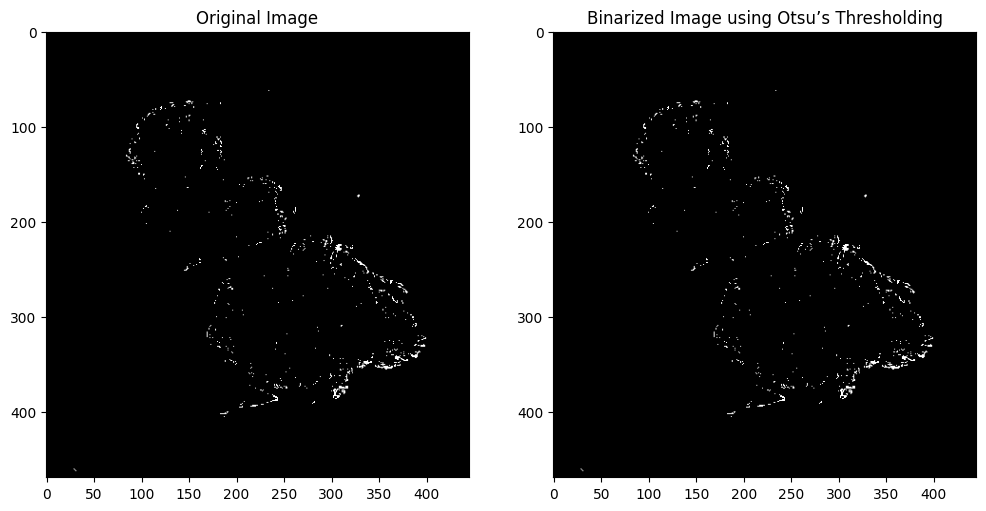

In [18]:

# Convert from '>u2' to 'uint8' if necessary
# if img.dtype == np.dtype('>u2'):
img = (img / 256).astype(np.uint8)  # Convert from 16-bit to 8-bit

# Apply Otsu's thresholding
_, binarized_img = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Show the original and binarized images
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(binarized_img, cmap='gray')
plt.title('Binarized Image using Otsu’s Thresholding')

In [19]:
img_pth = '/share/ymz/valisProject/results_modified/P18_2023-10-03-020128/P18/processed/P18-01.png'
img_pro = cv2.imread(img_pth, cv2.IMREAD_GRAYSCALE)

In [20]:
img_pro.shape

(525, 462)

In [21]:
img.shape, img.dtype

((469, 445), dtype('uint8'))

In [22]:
img.max()

1

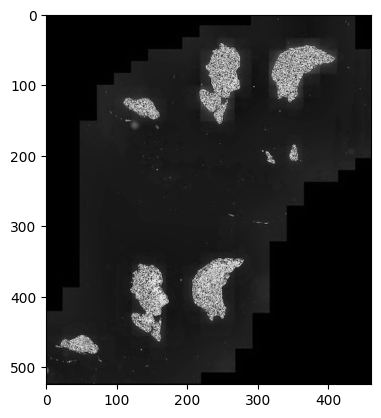

In [23]:
plt.imshow(img_pro, cmap='gray')

In [24]:
def compute_centroid(binary_image):
    """
    Compute the centroid of a connected component in a binary image.

    :param binary_image: 2D numpy array, binary image with connected component.
    :return: tuple of ints, (x, y) coordinates of the centroid.
    """
    y, x = np.where(binary_image > 0)
    centroid = (np.mean(x), np.mean(y))
    return centroid

def compute_distance(image, val1, val2):
    """
    Compute the Euclidean distance between two centroids.

    :param centroid1: tuple of ints, (x, y) coordinates of the first centroid.
    :param centroid2: tuple of ints, (x, y) coordinates of the second centroid.
    :return: float, Euclidean distance between the two centroids.
    """
    centroid1 = compute_centroid(image == val1)
    centroid2 = compute_centroid(image == val2)
    print(centroid1, centroid2)
    return np.sqrt((centroid1[0] - centroid2[0]) ** 2 + (centroid1[1] - centroid2[1]) ** 2)

In [25]:
def connected_component_properties(binary_image):
    """
    Compute and return properties of connected components within a binary image.

    Parameters:
    - binary_image: 2D numpy array of binary image.

    Returns:
    - properties_list: list of dicts, where each dict contains the 'perimeter' and 
                       'approx_diameter' of a connected component.
    """
    num_labels, labels_im = cv2.connectedComponents(binary_image)
    properties_list = []

    for i in range(1, num_labels):
        component_mask = (labels_im == i).astype(np.uint8) * 255

        # Compute perimeter
        contours, _ = cv2.findContours(component_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        perimeter = cv2.arcLength(contours[0], True)

        # Compute approximate diameter
        # Note: This is a very basic approximation, you might need a more sophisticated approach
        area = cv2.contourArea(contours[0])
        approx_diameter = np.sqrt(4*area/np.pi)

        properties_list.append({
            'area': 
            'perimeter': perimeter,
            'approx_diameter': approx_diameter
        })

    return properties_list

SyntaxError: invalid syntax (3586679546.py, line 29)

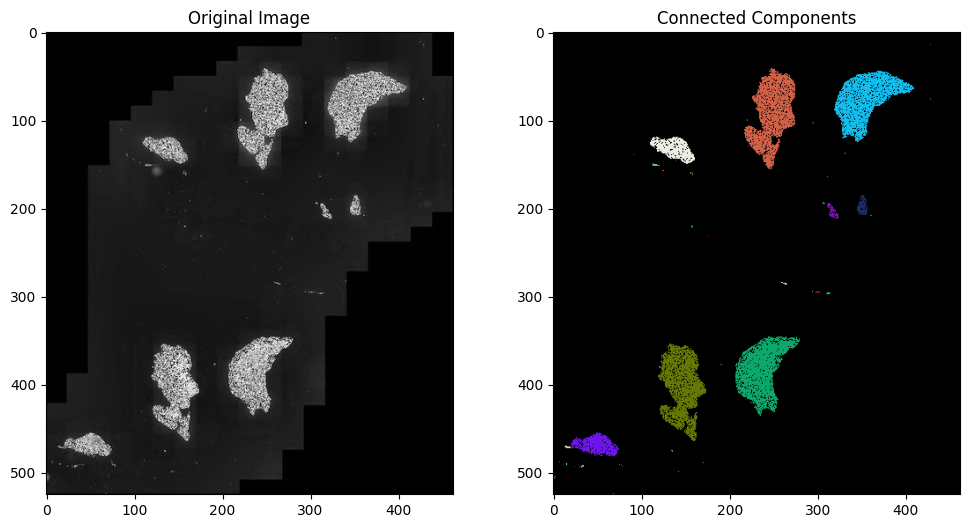

In [ ]:
# 使用阈值分割将图像二值化
_, binarized_img = cv2.threshold(img_pro, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# 提取连通域
num_labels, labels_im = cv2.connectedComponents(binarized_img)

# 创建一个颜色映射以可视化连通域
colors = [(0, 0, 0)]  # 背景色为黑色
for _ in range(1, num_labels):
    colors.append((np.random.randint(0, 255), np.random.randint(0, 255), np.random.randint(0, 255)))

# 创建一个RGB图像来可视化连通域
output_img = np.zeros((binarized_img.shape[0], binarized_img.shape[1], 3), dtype=np.uint8)
for y in range(labels_im.shape[0]):
    for x in range(labels_im.shape[1]):
        output_img[y, x, :] = colors[labels_im[y, x]]

# 使用matplotlib显示原图像和连通域图像
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1), plt.imshow(img_pro, cmap='gray'), plt.title('Original Image')
plt.subplot(1, 2, 2), plt.imshow(output_img), plt.title('Connected Components')
plt.show()

In [ ]:
compute_distance(labels_im, 2, 28)

(248.2037153652393, 92.999055415617121) (236.81128979323924, 384.46767312110273)


291.69117653360735

In [ ]:
compute_distance(labels_im, 2, 29)

(248.2037153652393, 92.999055415617121) (145.84564425306394, 403.22225902616759)


326.6735538426675

In [ ]:
compute_distance(labels_im, 28, 29)

(236.81128979323924, 384.46767312110273) (145.84564425306394, 403.22225902616759)


92.878862832246568

In [ ]:
num_labels

49

In [ ]:
# 获取每个连通域的面积
area_list = []
for i in range(1, num_labels):  # 排除背景的面积计算
    area = np.sum(labels_im == i)
    area_list.append((i, area))

# 根据面积从大到小对连通域进行排序
sorted_areas = sorted(area_list, key=lambda x: x[1], reverse=True)

# 打印排序后的连通域面积
for index, area in sorted_areas:
    print(f"Label: {index}, Area: {area}")

Label: 2, Area: 3176
Label: 3, Area: 3158
Label: 28, Area: 3047
Label: 29, Area: 3019
Label: 7, Area: 819
Label: 34, Area: 816
Label: 18, Area: 178
Label: 20, Area: 96
Label: 12, Area: 14
Label: 35, Area: 14
Label: 47, Area: 12
Label: 24, Area: 9
Label: 27, Area: 8
Label: 45, Area: 6
Label: 19, Area: 5
Label: 26, Area: 5
Label: 6, Area: 4
Label: 22, Area: 4
Label: 42, Area: 4
Label: 16, Area: 3
Label: 33, Area: 3
Label: 36, Area: 3
Label: 4, Area: 2
Label: 5, Area: 2
Label: 9, Area: 2
Label: 10, Area: 2
Label: 11, Area: 2
Label: 14, Area: 2
Label: 15, Area: 2
Label: 21, Area: 2
Label: 30, Area: 2
Label: 32, Area: 2
Label: 37, Area: 2
Label: 40, Area: 2
Label: 1, Area: 1
Label: 8, Area: 1
Label: 13, Area: 1
Label: 17, Area: 1
Label: 23, Area: 1
Label: 25, Area: 1
Label: 31, Area: 1
Label: 38, Area: 1
Label: 39, Area: 1
Label: 41, Area: 1
Label: 43, Area: 1
Label: 44, Area: 1
Label: 46, Area: 1
Label: 48, Area: 1
